In [1]:
# Import Dependencies
%matplotlib notebook
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import linregress
import seaborn as sns

In [2]:
# Read CSV containing clean data 

state_clean_data = "Data_ASpirou/state_clean_data.csv"

state_clean_data = pd.read_csv(state_clean_data)
state_clean_data.head()

,State,Unemployment_Num,Unemployment_Den,Unemployment_Perc,Uninsured_Num,Uninsured_Den,Uninsured_Perc,Uninsured_Adults_Num,Uninsured_Adults_Den,Uninsured_Adults_Perc,...,Firearms_Fatalities_Perc,Drugs_Overdose_Death_Num,Drugs_Overdose_Death_Den,Drugs_Overdose_Deaths_Perc,Premature_Deaths_Num,Premature_Deaths_Den,Premature_Deaths_Perc,Low_Birth_Weight_Num,Low_Birth_Weight_Den,Low_Birth_Weight_Perc
0,AK,51956.0,725572.0,0.071607,201574.0,1299028.0,0.155173,163858.0,929122.0,0.176358,...,0.000226,743.0,3995795.0,0.000186,16598.0,4269456.0,0.003888,9168.0,155451.0,0.058977
1,AL,190684.0,4336896.0,0.043968,855944.0,7946156.0,0.107718,802088.0,5791254.0,0.138500,...,0.000198,4512.0,27416637.0,0.000165,160880.0,27273632.0,0.005899,83790.0,825884.0,0.101455
2,AR,99670.0,2708544.0,0.036798,456684.0,4855014.0,0.094064,403944.0,3474804.0,0.116249,...,0.000180,2267.0,15808357.0,0.000143,95680.0,16718408.0,0.005723,47988.0,535980.0,0.089533
3,AZ,322628.0,6625442.0,0.048695,1339638.0,11226354.0,0.119330,1104656.0,8018912.0,0.137756,...,0.000149,8370.0,41522215.0,0.000202,156792.0,38639850.0,0.004058,84784.0,1191676.0,0.071147
4,CA,1837766.0,38623920.0,0.047581,5574610.0,66523356.0,0.083799,5053256.0,48571872.0,0.104037,...,0.000079,28335.0,235691015.0,0.000120,687182.0,222305892.0,0.003091,469061.0,6909720.0,0.067884


In [3]:
# List column names 

state_clean_data.columns

Index(['State', 'Unemployment_Num', 'Unemployment_Den', 'Unemployment_Perc',
       'Uninsured_Num', 'Uninsured_Den', 'Uninsured_Perc',
       'Uninsured_Adults_Num', 'Uninsured_Adults_Den', 'Uninsured_Adults_Perc',
       'Uninsured_Children_Num', 'Uninsured_Children_Den',
       'Uninsured_Children_Perc', 'Diabetes_Prevalence_Num',
       'Diabetes_Prevalence_Den', 'Diabetes_Prevalence_Perc',
       'HIV_Prevalence_Num', 'HIV_Prevalence_Den', 'HIV_Prevalence_Perc',
       'Adult_Obesity_Num', 'Adult_Obesity_Den', 'Adult_Obesity_Perc',
       'Violent_Crimes_Num', 'Violent_Crimes_Den', 'Violent_Crimes_Perc',
       'Injury_Deaths_Num', 'Injury_Deaths_Den', 'Injury_Deaths_Perc',
       'Homicides_Num', 'Homicides_Den', 'Homicides_Perc',
       'Firearms_Fatality_Num', 'Firearms_Fatality_Den',
       'Firearms_Fatalities_Perc', 'Drugs_Overdose_Death_Num',
       'Drugs_Overdose_Death_Den', 'Drugs_Overdose_Deaths_Perc',
       'Premature_Deaths_Num', 'Premature_Deaths_Den', 'Premature_De

In [4]:
# Using column names, create a new dataframe containing only unemployment and crime data

crime_df = state_clean_data[['State','Unemployment_Perc', 'Violent_Crimes_Perc',
    'Injury_Deaths_Perc','Homicides_Perc','Firearms_Fatalities_Perc']]
crime_df.head()

,State,Unemployment_Perc,Violent_Crimes_Perc,Injury_Deaths_Perc,Homicides_Perc,Firearms_Fatalities_Perc
0,AK,0.071607,0.007815,0.000911,0.000072,0.000226
1,AL,0.043968,0.004793,0.000799,0.000096,0.000198
2,AR,0.036798,0.005205,0.000806,0.000080,0.000180
3,AZ,0.048695,0.004107,0.000808,0.000057,0.000149
4,CA,0.047581,0.004194,0.000489,0.000050,0.000079


In [5]:
# Check the type of data contained in new dataframe

crime_df.dtypes

State                        object
Unemployment_Perc           float64
Violent_Crimes_Perc         float64
Injury_Deaths_Perc          float64
Homicides_Perc              float64
Firearms_Fatalities_Perc    float64
dtype: object

In [6]:
# Multiply any numeric data by 100 in order to get percentage

crime_df[crime_df.select_dtypes(include=['number']).columns] *= 100
crime_df.head()

C:\Users\angsp\Anaconda3\lib\site-packages\pandas\core\frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,State,Unemployment_Perc,Violent_Crimes_Perc,Injury_Deaths_Perc,Homicides_Perc,Firearms_Fatalities_Perc
0,AK,7.160695,0.781482,0.091116,0.007156,0.022575
1,AL,4.396785,0.479308,0.079909,0.009561,0.019831
2,AR,3.679837,0.520509,0.080590,0.008029,0.018040
3,AZ,4.869532,0.410696,0.080774,0.005707,0.014850
4,CA,4.758103,0.419406,0.048931,0.004963,0.007908


In [7]:
# Save the new dataframe as a separate csv file for possible future usage

crime_df.to_csv("Data_ASpirou/crime_data.csv")

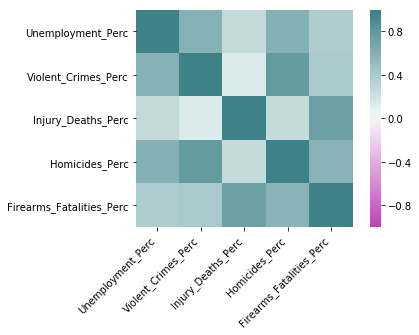

In [8]:
# Use Seaborn heatmap to quickly search for any correlations in data

corr = crime_df.corr()

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(-50, 200, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

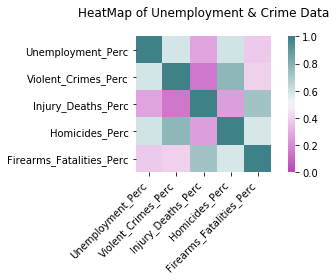

In [9]:
# Due to above heatmap showing only positive correlations, change the vmin, vmax and center in order to 
# more accurately gain a sense of trends in data

corr = crime_df.corr()
ax = sns.heatmap(
    corr, 
    vmin=0, vmax=1, center=0.5,
    cmap=sns.diverging_palette(-50, 200, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

ax.set_title('HeatMap of Unemployment & Crime Data', pad = 20)
plt.tight_layout()
fig = ax.get_figure()
fig.savefig("Images_ASpirou/Unemployment_Crime_HeatMap_ASpirou.png", dpi = 200)

In [10]:
# Gain a description of min and max per column to use for limits of axes for graphs

crime_df.describe(include='all')

,State,Unemployment_Perc,Violent_Crimes_Perc,Injury_Deaths_Perc,Homicides_Perc,Firearms_Fatalities_Perc
count,51,51.000000,51.000000,51.000000,51.000000,51.000000
unique,51,NaN,NaN,NaN,NaN,NaN
top,NH,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN
mean,NaN,4.193219,0.378371,0.074551,0.005390,0.012659
std,NaN,0.952785,0.183835,0.013191,0.002939,0.004609
min,NaN,2.360162,0.123312,0.047280,0.001431,0.003347
25%,NaN,3.488960,0.253039,0.065825,0.003117,0.010261
50%,NaN,4.267857,0.335461,0.074139,0.005387,0.012328
75%,NaN,4.758988,0.452310,0.081680,0.007126,0.016168


# Following codes create scattor plots of relationships in data:

   ### 1. Relationship between Unemployment & Violent Crimes per State
   ### 2. Relationship between Unemployment & Homicides per State
   ### 3. Relationship between Unemployment & Death by Injury per State
   ### 4. Relationship between Unemployment & Firearms Fatalities per State

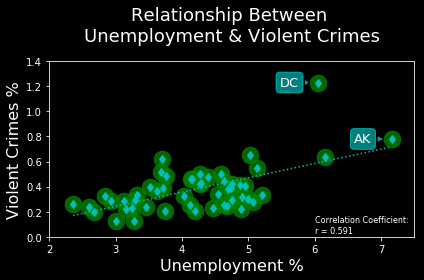

In [11]:
# Put all code within a with statement in order to create a dark background
with plt.style.context('dark_background'):
    
    # Create scatter plot 
    crime_df.plot(kind='scatter', x='Unemployment_Perc', y='Violent_Crimes_Perc', color = 'green', alpha=.8, s=275)

    # Gain a best-fit line for graph
    x = crime_df['Unemployment_Perc']
    y = crime_df['Violent_Crimes_Perc']
    gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    mn=np.min(x)
    mx=np.max(x)
    x1=np.linspace(mn,mx,500)
    y1=gradient*x1+intercept
    plt.plot(x,y,'dc')
    plt.plot(x1,y1,':c')

    # Input text boxes indicating which states are seen as possible points skewing data
    plt.annotate('DC', xy=(5.93, 1.23),  
             xytext=(-30, 0), textcoords='offset points',
             size=13, ha='left', va="center",
             bbox=dict(boxstyle="round", alpha=0.5, color='cyan'),
             arrowprops=dict(arrowstyle="wedge,tail_width=0.3", alpha=0.5, color='cyan'));
    
    plt.annotate('AK', xy=(7.05, 0.78),  
             xytext=(-30, 0), textcoords='offset points',
             size=13,ha='left', va="center",
             bbox=dict(boxstyle="round", alpha=0.5, color='cyan'),
             arrowprops=dict(arrowstyle="wedge,tail_width=0.3", alpha=0.5, color='cyan'));  
    
    # Calculate the correlation coefficient, round to 3 decimal places, and add as text on graph
    unem_viol_corr = crime_df['Unemployment_Perc'].corr(crime_df['Violent_Crimes_Perc'])
    unem_viol_corr = str(round(unem_viol_corr,3))
    corr = f'Correlation Coefficient: \nr = {unem_viol_corr}'
    plt.xlim(2.0, 7.5)
    plt.ylim(0, 1.4)
    plt.text(6.00,0.03,corr, fontsize = 8)
    
    # Input title and axis labels
    plt.title("Relationship Between \nUnemployment & Violent Crimes", fontsize = 18, loc = "center", pad = 20)
    plt.xlabel("Unemployment %", fontsize = 16)
    plt.ylabel("Violent Crimes %", fontsize = 16)

    # Create a tight layout in order to accurately save
    plt.tight_layout()
    
    # Save a png file of the figure
    plt.savefig("Images_ASpirou/Unemployment_ViolentCrime_Corr_ASpirou", dpi = 200)
    
plt.show()


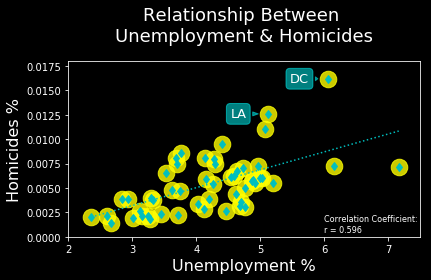

In [12]:
# Put all code within a with statement in order to create a dark background
with plt.style.context('dark_background'):
    
    # Create scatter plot 
    crime_df.plot(kind='scatter', x='Unemployment_Perc', y='Homicides_Perc', color = 'yellow', s=275, alpha=.8)

    
    # Gain a best-fit line for graph    
    x = crime_df['Unemployment_Perc']
    y = crime_df['Homicides_Perc']
    gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    mn=np.min(x)
    mx=np.max(x)
    x1=np.linspace(mn,mx,500)
    y1=gradient*x1+intercept
    plt.plot(x,y,'dc')
    plt.plot(x1,y1,':c')
    
    # Input text boxes indicating which states are seen as possible points skewing data    
    plt.annotate('DC', xy=(5.93, 0.0162),  
        xytext=(-30, 0), textcoords='offset points',
        size=13, ha='left', va="center",
        bbox=dict(boxstyle="round", alpha=0.5, color='cyan'),
        arrowprops=dict(arrowstyle="wedge,tail_width=0.3", alpha=0.5, color='cyan'));
    
    plt.annotate('LA', xy=(5, 0.0126),  
        xytext=(-30, 0), textcoords='offset points',
        size=13, ha='left', va="center",
        bbox=dict(boxstyle="round", alpha=0.5, color='cyan'),
        arrowprops=dict(arrowstyle="wedge,tail_width=0.3", alpha=0.5, color='cyan'));    

    # Calculate the correlation coefficient, round to 3 decimal places, and add as text on graph
    unem_hom_corr = crime_df['Unemployment_Perc'].corr(crime_df['Homicides_Perc'])
    unem_hom_corr = str(round(unem_hom_corr, 3))
    corr = f'Correlation Coefficient:\nr = {unem_hom_corr}'
    plt.xlim(2.0, 7.5)
    plt.ylim(0.0, 0.018)
    plt.text(6.00,0.0005,corr, fontsize = 8)

    # Input title and axis labels
    plt.title("Relationship Between \nUnemployment & Homicides", fontsize = 18, loc = "center", pad = 20)
    plt.xlabel("Unemployment %", fontsize = 16)
    plt.ylabel("Homicides %", fontsize = 16)

    # Create a tight layout in order to accurately save 
    plt.tight_layout()
    
    # Save a png file of the figure
    plt.savefig("Images_ASpirou/Unemployment_Homicides_Corr_ASpirou", dpi = 200)
    
    
plt.show()

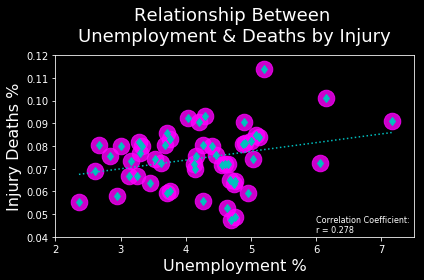

In [13]:
# Put all code within a with statement in order to create a dark background
with plt.style.context('dark_background'):
    
    
    # Create scatter plot 
    crime_df.plot(kind='scatter', x='Unemployment_Perc', y='Injury_Deaths_Perc', color = 'magenta', s=275, alpha = 0.8)

    # Gain a best-fit line for graph     
    x = crime_df['Unemployment_Perc']
    y = crime_df['Injury_Deaths_Perc']
    gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    mn=np.min(x)
    mx=np.max(x)
    x1=np.linspace(mn,mx,500)
    y1=gradient*x1+intercept
    plt.plot(x,y,'dc')
    plt.plot(x1,y1,':c')

    # Calculate the correlation coefficient, round to 3 decimal places, and add as text on graph    
    unem_death_corr = crime_df['Unemployment_Perc'].corr(crime_df['Injury_Deaths_Perc'])
    unem_death_corr = str(round(unem_death_corr,3))
    corr = f'Correlation Coefficient: \nr = {unem_death_corr}'
    plt.xlim(2.0, 7.5)
    plt.ylim(0.04, 0.12)
    plt.text(6.00, 0.042, corr, fontsize = 8)
    
    # Input title and axis labels
    plt.title("Relationship Between \nUnemployment & Deaths by Injury", fontsize = 18, loc = "center", pad = 14)
    plt.xlabel("Unemployment %", fontsize = 16)
    plt.ylabel("Injury Deaths %", fontsize = 16)
    
    # Create a tight layout in order to accurately save 
    plt.tight_layout()
    
    # Save a png file of the figure
    plt.savefig("Images_ASpirou/Unemployment_InjuryDeaths_Corr_ASpirou", dpi = 200)
    
    
plt.show()

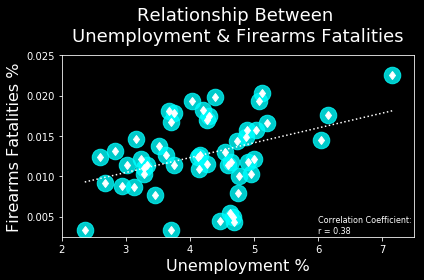

In [14]:
# Put all code within a with statement in order to create a dark background
with plt.style.context('dark_background'):
    
    # Create scatter plot
    crime_df.plot(kind='scatter', x='Unemployment_Perc', y='Firearms_Fatalities_Perc', color = 'cyan', s=275, alpha=0.8)

    # Gain a best-fit line for graph 
    x = crime_df['Unemployment_Perc']
    y = crime_df['Firearms_Fatalities_Perc']
    gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    mn=np.min(x)
    mx=np.max(x)
    x1=np.linspace(mn,mx,500)
    y1=gradient*x1+intercept
    plt.plot(x,y,'dw')
    plt.plot(x1,y1,':w')
    
    # Calculate the correlation coefficient, round to 3 decimal places, and add as text on graph 
    unem_fire_corr = crime_df['Unemployment_Perc'].corr(crime_df['Firearms_Fatalities_Perc'])
    unem_fire_corr = str(round(unem_fire_corr,3))
    corr = f'Correlation Coefficient: \nr = {unem_fire_corr}'
    plt.xlim(2.0, 7.5)
    plt.ylim(0.0025, 0.025)
    plt.text(6, 0.003, corr, fontsize = 8)
    
    # Input title and axis labels
    plt.title("Relationship Between \nUnemployment & Firearms Fatalities", fontsize = 18, loc = "center", pad = 14)
    plt.xlabel("Unemployment %", fontsize = 16)
    plt.ylabel("Firearms Fatalities %", fontsize = 16)
    
    # Create a tight layout in order to accurately save 
    plt.tight_layout()
    
    # Save a png file of the figure
    plt.savefig("Images_ASpirou/Unemployment_FirearmsFatalities_Corr_ASpirou", dpi = 200)
plt.show()